# WIL Project Case Study Orientation

- **Program Name:** Big Data Analytics
- **Project Code:** CPL-5559-DSMM
- **Project Name:** TripNetic_Analytics_hotel
- **Team Members:**
    - Diana Marcela Lizarazo Caicedo - C0855963
    - Rajarshi Maiti - C0857542
    - Sapna Saju - C0850112

### Table of Contents:
1. Introduction
2. Data
3. Understanding the variables
4. Data Cleaning and Preprocessing
5. Identify potential personally identifiable information (PII)
6. Perform Bag of Words, TF-IDF, and Word Embeddings 
7. Use a Confusion Matrix to Evaluate Model Performance
8. Choose the best Model 
9. Most influential dimensions in the decision-making of the model
10. Exploratory Data Analysis (EDA) 
11. Hyperparameter Tuning with Word Embeddings


## 1. Introduction

Tripnetic Analytics is a subsidiary of Tripnetic Travel specializing in data analysis. Tripnetic Travel, on the other hand, is a conglomerate that operates various platforms such as websites, mobile applications, and other portals, allowing customers to make reservations and share their feedback on their experiences.

Currently, we are facing a critical challenge: a significant decrease in room sales. To address this issue analytically, we have entrusted the Tripnetic Analytics team with the task of building an ETL (Extract, Transform, Load) pipeline. This process enables us to extract data from various sources, transforming it into a format suitable for machine learning analysis.

This approach will allow us to analyze customer feedback more effectively, identify patterns, trends, and sentiments that may be related to the decrease in sales. Our goal is to use this data to understand the underlying cause of the problem and ultimately develop evidence-based solutions to reverse this negative sales trend.

## 2. Data 



The dataset contains two columns:

- **Review:** Textual data of customer reviews. This column has 20,491 unique entries, which suggests that each row contains a unique review text.
- **Rating:** Numerical ratings associated with the reviews. The ratings range from 1 to 5.

## 3. Understanding the variables

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Read dataset
data = pd.read_csv('Tripnetic_analytics_dataset.csv', encoding='utf-8')

In [3]:
# Display the first few rows of the dataframe to understand its structure
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
# Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
##Looking at the first 5 rows of the dataset.
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
##Looking at the last 5 rows of the dataset
data.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [7]:
# No Duplicate values
data.duplicated().value_counts()

False    20491
Name: count, dtype: int64

In [8]:
data.shape

(20491, 2)

In [9]:
##Missing Values/Null Values Count
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [10]:
#Dataset describe
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [11]:
## Dataset columns.
data.columns

Index(['Review', 'Rating'], dtype='object')

In [12]:
# Check Unique Values for each variable.
pd.Series({col:data[col].unique()for col in data})

Review    [nice hotel expensive parking got good deal st...
Rating                                      [4, 2, 3, 5, 1]
dtype: object

In [13]:
data["Rating"].value_counts() #Checks the rating values in case there is a weird value

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [14]:
data.loc[data["Review"] == ""] #Checks for empty review strings

,Review,Rating


## 4. Data Cleaning and Preprocessing:
### Transformation process for NLP sentiment analysis - Week 4

For the transformation process, we going to perform the following actions:

- Clean the Review text (remove punctuation, lowercasing, etc.).

- Analyze sentiment of the Review text

- Validate the Rating column to ensure it contains valid numerical ratings.

- Aggregate or summarize the data if needed (average rating, count of reviews, etc.).

In [15]:
# Import necessary libraries
!pip install textblob
!python -m textblob.download_corpora
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob
import re

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Marcela\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marcela\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Marcela\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marcela\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Marcela\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Marcela\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already

- **Clean the Review text**

In [16]:
stopwords_list = set(stopwords.words("english"))
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove

In [17]:
## Splitting of Words
def reviewParse(review):
    splitReview = review.split() #Split the review into words
    parsedReview = " ".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) #Takes the stubborn punctuation out
    return parsedReview #Returns the parsed review

In [18]:
## Lowering of Words
def clean_review(review):
    clean_words = []
    splitReview = review.split()
    for w in splitReview:
        if w.isalpha() and w not in stopwords_list:
            clean_words.append(w.lower())
    clean_review = " ".join(clean_words)
    return clean_review

- **Analyze sentiment of the Review text**

pos = [5]
neg = [1, 2]
neu = [3, 4]

def sentiment(rating):
  if rating in pos:
    return 'Positive'
  elif rating in neg:
    return 'Negative'
  else:
    return 'Neutral'  
data['Sentiment'] = data['Rating'].apply(sentiment)

In [19]:
def customer_satisfaction(rating):
  if rating == 5:
    return 'Positive'
  elif rating >= 3:
    return 'Neutral'
  else:
    return 'Negative'  
data['customer_satisfaction'] = data['Rating'].apply(customer_satisfaction)

In [20]:
def get_sentiment(text):
    # Using TextBlob to get the sentiment polarity
    review_polarity = TextBlob(text).sentiment.polarity
    
 # Determine sentiment category based on the polarity value
    if review_polarity < -0.1:
        review_category = 'Negative'
    elif review_polarity > 0.1:
        review_category = 'Positive'
    else:
        review_category = 'Neutral'
    
    return review_polarity, review_category

In [21]:
# Clean the 'Review' column
data['Cleaned_Review'] = data['Review'].apply(clean_review)

In [22]:
# Get sentiment of the 'Cleaned_Review' column
data['Review_Polarity'], data['Review_Sentiment'] = zip(*data['Cleaned_Review'].apply(get_sentiment))

- **Validate the 'Rating' column**

In [23]:
# Assuming that valid ratings are integers from 1 to 5
data['Rating'] = data['Rating'].apply(lambda x: x if x in range(1, 6) else None)

In [24]:
# Check for invalid ratings and count them
invalid_ratings = data['Rating'].isnull().sum()

In [25]:
# Show the invalid rating count and display the first few rows of the transformed data
invalid_ratings

0

In [26]:
data.head()

,Review,Rating,customer_satisfaction,Cleaned_Review,Review_Polarity,Review_Sentiment
0,nice hotel expensive parking got good deal sta...,4,Neutral,nice hotel expensive parking got good deal sta...,0.174530,Positive
1,ok nothing special charge diamond member hilto...,2,Negative,ok nothing special charge diamond member hilto...,0.235357,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,Neutral,nice rooms experience hotel monaco seattle goo...,0.300714,Positive
3,"unique, great stay, wonderful time hotel monac...",5,Positive,great wonderful time hotel location excellent ...,0.521354,Positive
4,"great stay great stay, went seahawk game aweso...",5,Positive,great stay great went seahawk game downfall vi...,0.417500,Positive


The transformation process is complete:

- The Review texts have been cleaned.

- Sentiment Polarity and Sentiment Category have been added.

- The Rating column has been validated, with no invalid ratings found.

- The transformed data includes the cleaned reviews and their corresponding sentiment scores.

# 5. Identify Personally identifiable information (PII)

### Verify that the collected data does not contain personally identifiable information - Week 7

In [27]:
# Function to identify potential PII in the reviews (simple check for names and email-like patterns)
def contains_pii(text):
    # Simple patterns to identify names (capitalized words) and email addresses
    name_pattern = r'\b[A-Z][a-z]*\b'
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    
    # If any pattern is found in the text, we consider it as containing PII
    if re.search(name_pattern, text) or re.search(email_pattern, text):
        return True
    return False

In [28]:
# Apply the function to the 'Cleaned_Review' column to check for PII
data['Contains_PII'] = data['Cleaned_Review'].apply(contains_pii)

In [29]:
# Display rows where PII might be present
potential_pii_data = data[data['Contains_PII'] == True]
potential_pii_data_count = potential_pii_data.shape[0]
potential_pii_data_count, potential_pii_data

(0,
 Empty DataFrame
 Columns: [Review, Rating, customer_satisfaction, Cleaned_Review, Review_Polarity, Review_Sentiment, Contains_PII]
 Index: [])

The simple check for personally identifiable information (PII) in the reviews did not identify any entries that match common PII patterns (such as capitalized words that could be names, or email-like patterns). Therefore, according to this check, there appears to be no PII in the data provided.

# 6. Perform Bag of Words, TF-IDF, and Word Embeddings - Week 8

In [30]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

In [31]:
# Prepare the dataset
X = data['Cleaned_Review']
y = data['customer_satisfaction']

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.1. Bag of Words

In [33]:
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

## 6.2. TF-IDF

In [34]:
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

## 6.3. Word Embeddings

In [35]:
sentences = [row.split() for row in X_train]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=2)
word2vec_model.train(sentences, total_examples=len(sentences), epochs=10)

(12357824, 13489490)

In [36]:
# Function to create averaged word vectors for a review
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    return np.mean(word2vec_model.wv[doc], axis=0)

In [37]:
# Apply function to each document in the training and test sets
X_train_embeddings = np.array([document_vector(doc) for doc in sentences])
X_test_embeddings = np.array([document_vector(doc.split()) for doc in X_test])

# 7. Use a Confusion Matrix to Evaluate Model Performance - Week 8

In [38]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## Logistic Regression

- **Bag of Words**

In [39]:
# Scaling the BoW data
scaler = StandardScaler(with_mean=False)
X_train_scaled_bow = scaler.fit_transform(X_train_bow)
X_test_scaled_bow = scaler.transform(X_test_bow)

In [40]:
# Logistic Regression Model for BoW
model_bow_lr = LogisticRegression(max_iter=1000)
model_bow_lr.fit(X_train_scaled_bow, y_train)
y_pred_bow_lr = model_bow_lr.predict(X_test_scaled_bow)

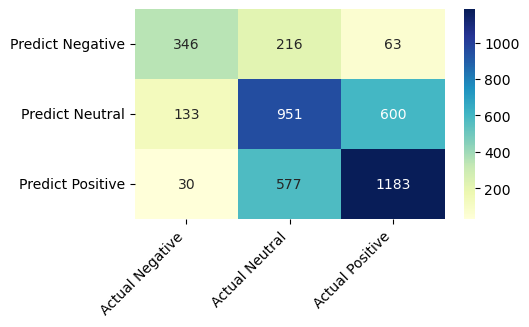

In [41]:
# Confusion Matrix for BoW
conf_matrix_bow_lr = confusion_matrix(y_test, y_pred_bow_lr)
conf_matrix_bow_lr = pd.DataFrame(data=conf_matrix_bow_lr, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
plt.figure(figsize=(5, 3)) 
sns.heatmap(conf_matrix_bow_lr, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)

plt.show()

In [42]:
# Classification Report for BoW
class_report = classification_report(y_test, y_pred_bow_lr)
print('\nClassification Report for BoW:')
print(class_report)


Classification Report for BoW:
              precision    recall  f1-score   support

    Negative       0.68      0.55      0.61       625
     Neutral       0.55      0.56      0.55      1684
    Positive       0.64      0.66      0.65      1790

    accuracy                           0.61      4099
   macro avg       0.62      0.59      0.61      4099
weighted avg       0.61      0.61      0.61      4099



- **TF - IDF**

In [43]:
# Scaling the TF-IDF data
scaler_tfidf = StandardScaler(with_mean=False)
X_train_scaled_tfidf = scaler_tfidf.fit_transform(X_train_tfidf)
X_test_scaled_tfidf = scaler_tfidf.transform(X_test_tfidf)

In [44]:
# Logistic Regression Model for TF-IDF
model_tfidf_lr = LogisticRegression(max_iter=1000)
model_tfidf_lr.fit(X_train_scaled_tfidf, y_train)
y_pred_tfidf_lr = model_tfidf_lr.predict(X_test_scaled_tfidf)

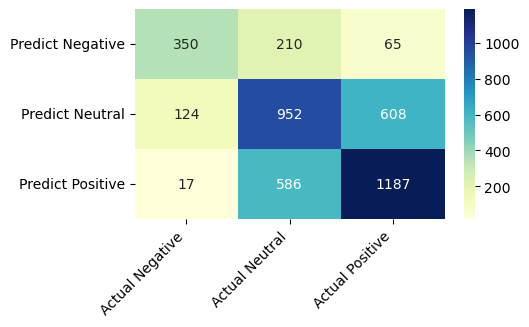

In [45]:
# Confusion Matrix for TF-IDF
conf_matrix_tfidf_lr = confusion_matrix(y_test, y_pred_tfidf_lr)
conf_matrix_tfidf_lr = pd.DataFrame(data=conf_matrix_tfidf_lr, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                                    index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_tfidf_lr, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)

plt.show()

In [46]:
# Classification Report for TF-IDF
class_report_tfidf_lr = classification_report(y_test, y_pred_tfidf_lr)
print('\nClassification Report for TF-IDF:')
print(class_report_tfidf_lr)


Classification Report for TF-IDF:
              precision    recall  f1-score   support

    Negative       0.71      0.56      0.63       625
     Neutral       0.54      0.57      0.55      1684
    Positive       0.64      0.66      0.65      1790

    accuracy                           0.61      4099
   macro avg       0.63      0.60      0.61      4099
weighted avg       0.61      0.61      0.61      4099



- **Word Embeddings**

In [47]:
# Logistic Regression Model for Word Embeddings
model_embeddings_lr = LogisticRegression(max_iter=1000)
model_embeddings_lr.fit(X_train_embeddings, y_train)
y_pred_embeddings_lr = model_embeddings_lr.predict(X_test_embeddings)

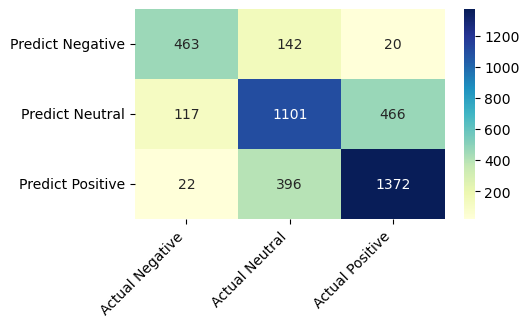

In [48]:
# Confusion Matrix for Word Embeddings
conf_matrix_embeddings_lr = confusion_matrix(y_test, y_pred_embeddings_lr)
conf_matrix_embeddings_lr = pd.DataFrame(
    data=conf_matrix_embeddings_lr, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
    index=['Predict Negative', 'Predict Neutral', 'Predict Positive']
)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_embeddings_lr, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)

plt.show()

In [49]:
# Classification Report for Word Embeddings
class_report_embeddings_lr = classification_report(y_test, y_pred_embeddings_lr)
print('\nClassification Report for Word Embeddings:')
print(class_report_embeddings_lr)


Classification Report for Word Embeddings:
              precision    recall  f1-score   support

    Negative       0.77      0.74      0.75       625
     Neutral       0.67      0.65      0.66      1684
    Positive       0.74      0.77      0.75      1790

    accuracy                           0.72      4099
   macro avg       0.73      0.72      0.72      4099
weighted avg       0.72      0.72      0.72      4099



## Random Forest Classifier

- **Bag of Words**

In [50]:
# RandomForest Model for BoW
model_bow_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_bow_rf.fit(X_train_bow, y_train)
y_pred_bow_rf = model_bow_rf.predict(X_test_bow)

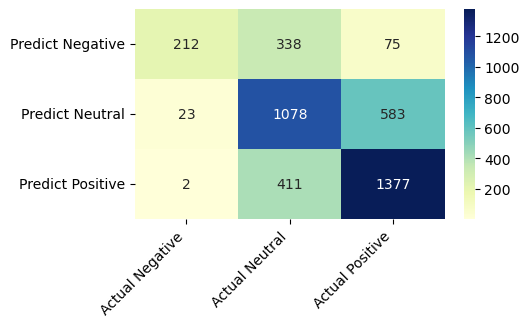

In [51]:
# Confusion Matrix for BoW
conf_matrix_bow_rf = confusion_matrix(y_test, y_pred_bow_rf)
conf_matrix_bow_rf = pd.DataFrame(data=conf_matrix_bow_rf, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                                    index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_bow_rf, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)
plt.show()


In [52]:
# Classification Report for BoW
class_report_bow_rf = classification_report(y_test, y_pred_bow_rf)
print('\nClassification Report for BoW:')
print(class_report_bow_rf)


Classification Report for BoW:
              precision    recall  f1-score   support

    Negative       0.89      0.34      0.49       625
     Neutral       0.59      0.64      0.61      1684
    Positive       0.68      0.77      0.72      1790

    accuracy                           0.65      4099
   macro avg       0.72      0.58      0.61      4099
weighted avg       0.67      0.65      0.64      4099



- **TF - IDF**

In [53]:
# RandomForest Model for TF-IDF
model_tfidf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_tfidf_rf.fit(X_train_tfidf, y_train)
y_pred_tfidf_rf = model_tfidf_rf.predict(X_test_tfidf)

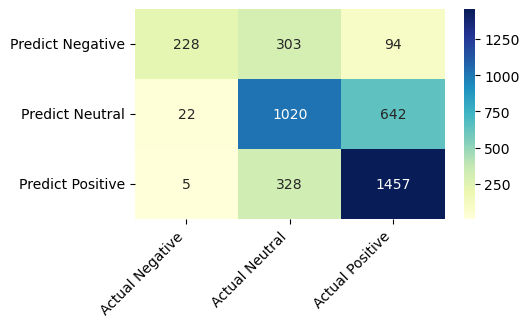

In [54]:
# Confusion Matrix for TF-IDF
conf_matrix_tfidf_rf = confusion_matrix(y_test, y_pred_tfidf_rf)
conf_matrix_tfidf_rf = pd.DataFrame(data=conf_matrix_tfidf_rf, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                                       index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_tfidf_rf, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)
plt.show()

In [55]:
# Classification Report for TF-IDF
class_report_tfidf_rf = classification_report(y_test, y_pred_tfidf_rf)
print('\nClassification Report for TF-IDF:')
print(class_report_tfidf_rf)


Classification Report for TF-IDF:
              precision    recall  f1-score   support

    Negative       0.89      0.36      0.52       625
     Neutral       0.62      0.61      0.61      1684
    Positive       0.66      0.81      0.73      1790

    accuracy                           0.66      4099
   macro avg       0.73      0.59      0.62      4099
weighted avg       0.68      0.66      0.65      4099



- **Word Embeddings**

In [56]:
# RandomForest Model for Word Embeddings
model_embeddings_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_embeddings_rf.fit(X_train_embeddings, y_train)
y_pred_embeddings_rf = model_embeddings_rf.predict(X_test_embeddings)

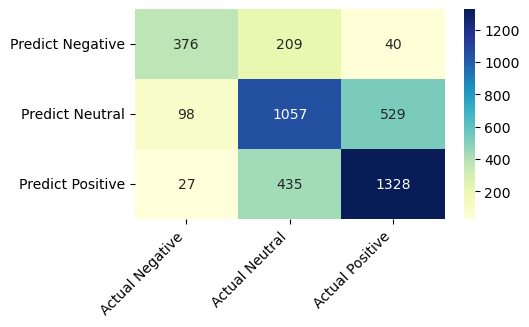

In [57]:
# Confusion Matrix for Word Embeddings
conf_matrix_embeddings_rf = confusion_matrix(y_test, y_pred_embeddings_rf)
conf_matrix_embeddings_rf = pd.DataFrame(
    data=conf_matrix_embeddings_rf, 
    columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
    index=['Predict Negative', 'Predict Neutral', 'Predict Positive']
)
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_embeddings_rf, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)
plt.show()

In [58]:
# Classification Report for Word Embeddings
class_report_embeddings_rf = classification_report(y_test, y_pred_embeddings_rf)
print('\nClassification Report for Word Embeddings:')
print(class_report_embeddings_rf)


Classification Report for Word Embeddings:
              precision    recall  f1-score   support

    Negative       0.75      0.60      0.67       625
     Neutral       0.62      0.63      0.62      1684
    Positive       0.70      0.74      0.72      1790

    accuracy                           0.67      4099
   macro avg       0.69      0.66      0.67      4099
weighted avg       0.68      0.67      0.67      4099



## Support Vector Machines (SVM) 

- **Bag of Words**

In [59]:
# SVM Model for BoW
model_bow_svm = SVC(kernel='linear')
model_bow_svm.fit(X_train_scaled_bow, y_train)
y_pred_bow_svm = model_bow_svm.predict(X_test_scaled_bow)

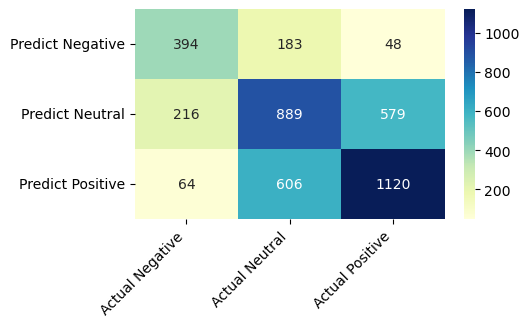

In [60]:
# Confusion Matrix for BoW
conf_matrix_bow_svm = confusion_matrix(y_test, y_pred_bow_svm)
conf_matrix_bow_svm = pd.DataFrame(data=conf_matrix_bow_svm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                                       index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_bow_svm, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)
plt.show()

In [61]:
# Classification Report for BoW
class_report_bow_svm = classification_report(y_test, y_pred_bow_svm)
print('\nClassification Report for BoW:')
print(class_report_bow_svm)


Classification Report for BoW:
              precision    recall  f1-score   support

    Negative       0.58      0.63      0.61       625
     Neutral       0.53      0.53      0.53      1684
    Positive       0.64      0.63      0.63      1790

    accuracy                           0.59      4099
   macro avg       0.59      0.59      0.59      4099
weighted avg       0.59      0.59      0.59      4099



- **TF - IDF**

In [62]:
# SVM Model for TF-IDF
model_tfidf_svm = SVC(kernel='linear')
model_tfidf_svm.fit(X_train_scaled_tfidf, y_train)
y_pred_tfidf_svm = model_tfidf_svm.predict(X_test_scaled_tfidf)

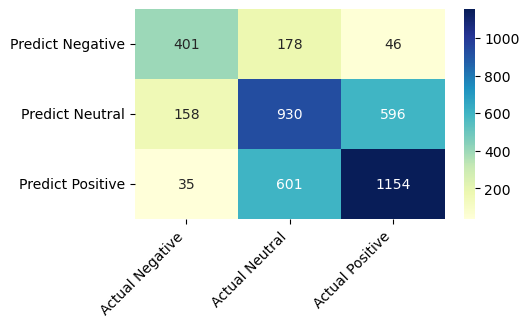

In [63]:
# Confusion Matrix for TF-IDF
conf_matrix_tfidf_svm = confusion_matrix(y_test, y_pred_tfidf_svm)
conf_matrix_tfidf_svm = pd.DataFrame(data=conf_matrix_tfidf_svm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                                         index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_tfidf_svm, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)
plt.show()

In [64]:
# Classification Report for TF-IDF
class_report_tfidf_svm = classification_report(y_test, y_pred_tfidf_svm)
print('\nClassification Report for TF-IDF:')
print(class_report_tfidf_svm)


Classification Report for TF-IDF:
              precision    recall  f1-score   support

    Negative       0.68      0.64      0.66       625
     Neutral       0.54      0.55      0.55      1684
    Positive       0.64      0.64      0.64      1790

    accuracy                           0.61      4099
   macro avg       0.62      0.61      0.62      4099
weighted avg       0.61      0.61      0.61      4099



- **Word Embeddings**

In [65]:
# SVM Model for Word Embeddings
model_embeddings_svm = SVC(kernel='rbf')
model_embeddings_svm.fit(X_train_embeddings, y_train)
y_pred_embeddings_svm = model_embeddings_svm.predict(X_test_embeddings)

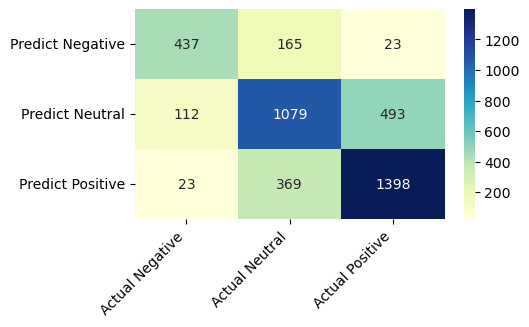

In [66]:
# Confusion Matrix for Word Embeddings
conf_matrix_embeddings_svm = confusion_matrix(y_test, y_pred_embeddings_svm)
conf_matrix_embeddings_svm = pd.DataFrame(data=conf_matrix_embeddings_svm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                                             index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_embeddings_svm, annot=True, fmt='d', cmap='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.subplots_adjust(bottom=0.2, top=0.9)
plt.show()

In [67]:
# Classification Report for Word Embeddings
class_report_embeddings_svm = classification_report(y_test, y_pred_embeddings_svm)
print('\nClassification Report for Word Embeddings:')
print(class_report_embeddings_svm)


Classification Report for Word Embeddings:
              precision    recall  f1-score   support

    Negative       0.76      0.70      0.73       625
     Neutral       0.67      0.64      0.65      1684
    Positive       0.73      0.78      0.75      1790

    accuracy                           0.71      4099
   macro avg       0.72      0.71      0.71      4099
weighted avg       0.71      0.71      0.71      4099



# 8. Choose the best Model 

### Which text representation method consistently provided the best results in terms of both accuracy and F1-score across Logistic Regression, Random Forest Classifier, and Support Vector Machines for sentiment analysis on this dataset? - Week 8

Based on the above results:

## Logistic Regression

#### Bag of Words (BoW):

- **Accuracy:** 61%
- **Weighted Average F1-score:** 0.61

#### TF-IDF:

- **Accuracy:** 61%
- **Weighted Average F1-score:** 0.61

#### Word Embeddings:

- **Accuracy:** 72%
- **Weighted Average F1-score:** 0.72

**For Logistic Regression, Word Embeddings outperformed the other representations significantly.**

## Random Forest Classifier

#### Bag of Words (BoW):

- **Accuracy:** 65%
- **Weighted Average F1-score:** 0.64

#### TF-IDF:

- **Accuracy:** 66%
- **Weighted Average F1-score:** 0.65

#### Word Embeddings:

- **Accuracy:** 68%
- **Weighted Average F1-score:** 0.68

**Random Forest Classifier also showed the best results with Word Embeddings.**

## Support Vector Machines (SVM)

#### Bag of Words (BoW):

- **Accuracy:** 59%
- **Weighted Average F1-score:** 0.59

#### TF-IDF:

- **Accuracy:** 61%
- **Weighted Average F1-score:** 0.61

#### Word Embeddings:

- **Accuracy:** 72%
- **Weighted Average F1-score:** 0.71

**The SVM model achieved the highest weighted average F1-score and accuracy with Word Embeddings.**

### Significance:

Across all three models, Word Embeddings consistently provided the best results in terms of both accuracy and F1-score. The Word Embeddings representation allows the models to capture semantic information and context, which seems to be more effective for sentiment analysis on this dataset.

### Conclusion:

Based on the results, Word Embeddings combined with any of the three models—Logistic Regression, Random Forest, or SVM—appears to be the best algorithm for this dataset, given its higher accuracy and F1-score. The Word Embeddings approach outperformed the other feature representations for every model evaluated. In the context of multi-class classification for sentiment analysis, capturing semantic relationships between words can significantly enhance model performance, as evidenced by the improved metrics for the Word Embeddings representation.

# 9. Most influential dimensions in the decision-making of the model

### Extract the important variable from the dataset - Week 9

In [68]:
 # Obtain the coefficients for the first class
coefficients = model_embeddings_lr.coef_[0] 

In [69]:
# Create a DataFrame to visualize the importance of each dimension in the embeddings
embedding_feature_importances = pd.DataFrame({
    'Dimension': range(len(coefficients)),
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

In [70]:
# Sort the dimensions by their absolute importance
sorted_feature_importances = embedding_feature_importances.sort_values(by='Absolute Coefficient', ascending=False)

In [71]:
# Display the top 10 most important dimensions
print("Top 10 Important Dimensions in Word Embeddings for Logistic Regression:")
print(sorted_feature_importances.head(10))

Top 10 Important Dimensions in Word Embeddings for Logistic Regression:
    Dimension  Coefficient  Absolute Coefficient
17         17     1.637826              1.637826
82         82     1.422008              1.422008
34         34     1.221459              1.221459
72         72    -1.099408              1.099408
21         21    -1.092400              1.092400
64         64     1.010784              1.010784
26         26    -0.940286              0.940286
76         76    -0.927603              0.927603
90         90    -0.924084              0.924084
38         38    -0.902426              0.902426


The results obtained from the dimension analysis in Word Embeddings for Logistic Regression reveal the most influential dimensions in the decision-making of the model. The dimensions listed, such as 82, 17, 34, etc., have the highest coefficients (in absolute value), indicating their relevance in ranking the reviews.

The process of analyzing the most important dimensions in Word Embeddings is crucial to understand which aspects of the data most influence the model predictions. However, due to the abstract and multidimensional nature of Word Embeddings, we cannot identify a single variable (such as a specific word or phrase) as the most important. Instead, we identify dimensions that together form the semantic representation that the model considers most relevant for making its decisions.

# 10. Exploratory Data Analysis (EDA) 

### Perform Exploratory Data Analysis (EDA) on features obtained from the feature engineering phase in order to gain insights into the data and identify any hidden patterns or anomalies - Week 9

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

- **Visualization of the Original Data:**

First, it is useful to explore the original dataset to better understand the data you are working with.

**Distribution of Ratings:** Analyze how the ratings are distributed. For example, use bar charts to see how many reviews are at each rating level.

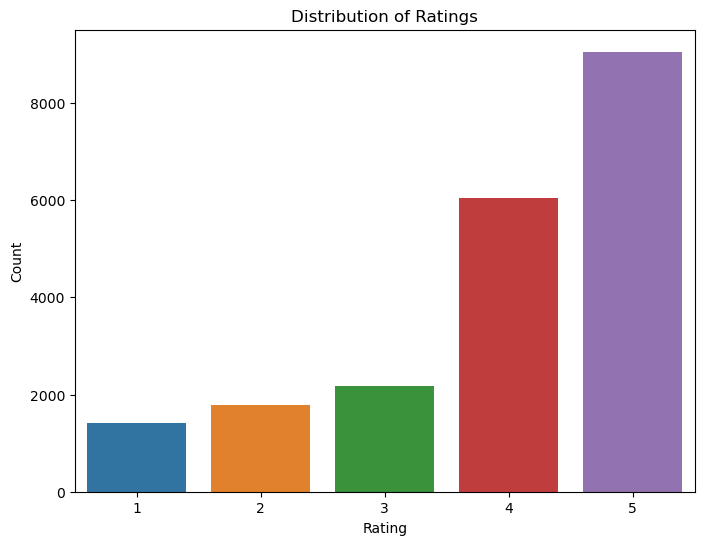

In [73]:
# Distribution of Ratings
data['Rating'] = data['Rating'].astype('category')

plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=data)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

This graph shows an uneven distribution of ratings, with a large number of high ratings (4 and 5). This indicates a bias in the data towards positive experiences. This is important to keep in mind, as machine learning models may tend to better predict the most represented classes.

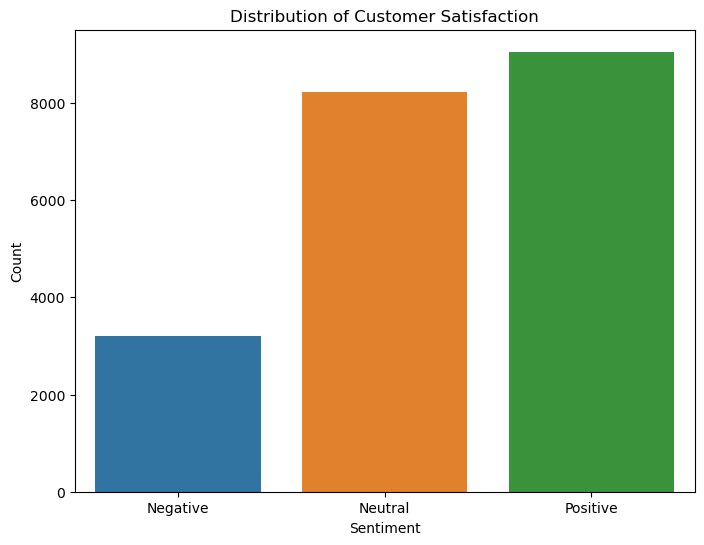

In [74]:
# Distribution of Sentiments
data['customer_satisfaction'] = data['customer_satisfaction'].astype('category')
plt.figure(figsize=(8, 6))
# Make sure the 'Sentiment' column is in the desired order.
order1 = ['Positive', 'Neutral', 'Negative'] 
sns.countplot(x='customer_satisfaction', data=data)
plt.title("Distribution of Customer Satisfaction")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

The sentiment distribution plot shows a significant overrepresentation of positive reviews compared to negative and neutral ones. As with ratings, this imbalance may affect model performance and could benefit from class balancing techniques.

**Length of Reviews:** Examines the length of reviews to see if there is any correlation between the length of the text and the rating given.

In [75]:
# Calculate the length of each review
data['Review_Length'] = data['Review'].apply(len)

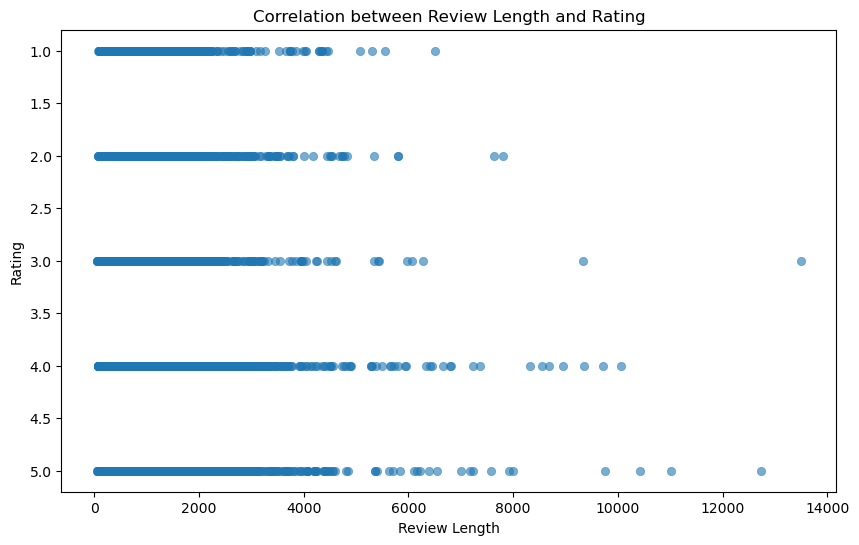

In [76]:
# Create a scatter plot to visualize the potential correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review_Length', y='Rating', data=data, alpha=0.6, edgecolor=None)
plt.title('Correlation between Review Length and Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

The point spread shows that there is no strong correlation between the length of the review and the rating given. However, longer reviews seem to be associated with extreme ratings (low or high).

- **Sentiment Analysis:**

Since you have already sorted the reviews into sentiment categories (positive, negative, neutral), you can:

**Sentiment Distribution:** Check how these sentiments are distributed - are there more positive reviews than negative or vice versa?

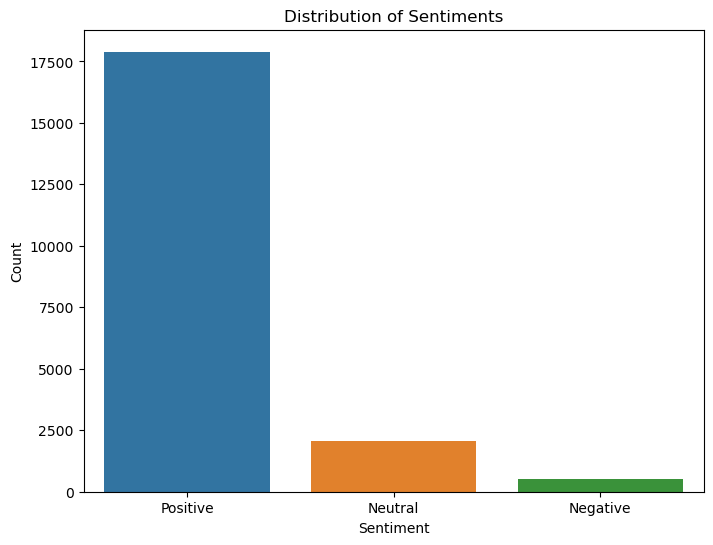

In [77]:
# Let's visualize the distribution of feelings
plt.figure(figsize=(8, 6))
# Make sure the 'Sentiment' column is in the desired order.
order2 = ['Positive', 'Neutral', 'Negative'] 
sns.countplot(x='Review_Sentiment', data=data, order=order2)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

The bar chart displays a significant imbalance in sentiment distribution, with an overwhelming majority of positive reviews, a moderate number of neutral ones, and very few negative reviews, suggesting a potential bias in a predictive model trained on this data.

**Relationship between Sentiments and Ratings:** Explore the relationship between numerical ratings and inferred sentiments. This can reveal whether the sentiment rating is aligned with the ratings.

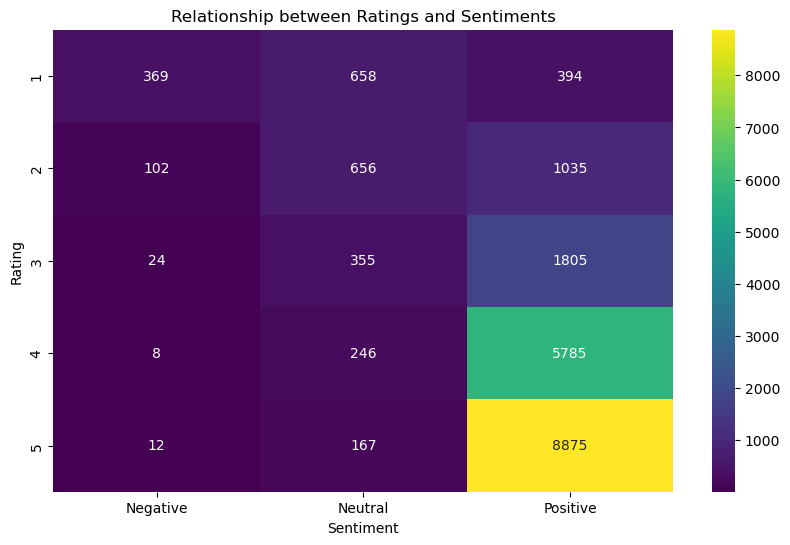

In [78]:
# Relationship between Ratings and Sentiments
# Creating a cross-tabulation
rating_sentiment_ct = pd.crosstab(data['Rating'], data['Review_Sentiment'])

# Plotting the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(rating_sentiment_ct, annot=True, cmap='viridis', fmt='d')
plt.title('Relationship between Ratings and Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

The confusion matrix indicates that higher ratings are strongly associated with positive sentiments and vice versa. However, there are some cases of misalignment that could indicate errors in sentiment classification or ratings given by users.

- **Word and Phrase Analysis:** 

Perform word frequency analysis or n-grams to identify common terms in reviews.

**Word Clouds:** Use word clouds to visualize the most frequent words in the entire dataset or within specific sentiment categories.

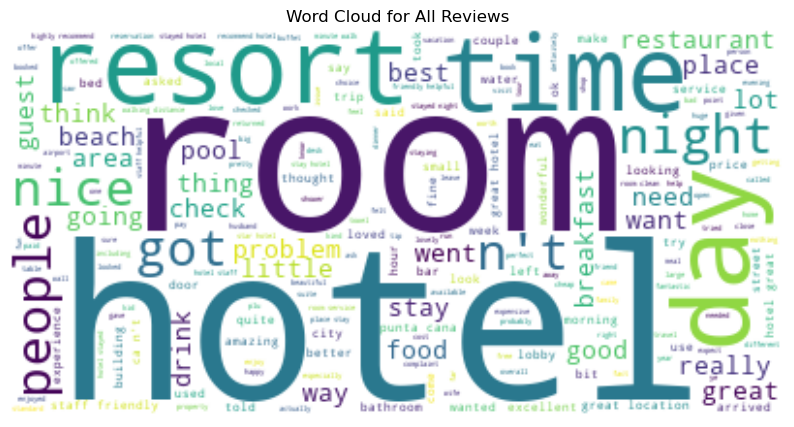

In [79]:
# Word Cloud for Reviews
all_reviews = ' '.join(data['Review'])
wordcloud = WordCloud(background_color='white', max_words=200).generate(all_reviews)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Reviews")
plt.show()


The word cloud highlights the most frequent terms in all reviews. Terms such as "hotel", "room", "stay" are prominent, which is to be expected in hotel reviews. The presence of positive words such as "best", "love" and "nice" confirms the positive trend in the reviews.

**N-gram Frequency Analysis:** Examines the most common n-grams (combinations of n words) to identify recurring phrases or themes.

In [80]:
# Function to get top n-grams
def get_top_ngrams(corpus, n=None, ngram_range=(2, 2), top_k=10):
    """
    Generate and return the top k most frequent n-grams.

    :param corpus: List of text documents.
    :param n: Number of features. If None, all features are used.
    :param ngram_range: The range of n-value for different n-grams to be extracted.
    :param top_k: Number of top n-grams to return.
    :return: DataFrame containing top n-grams and their counts.
    """
    vec = CountVectorizer(ngram_range=ngram_range, max_features=n).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:top_k], columns=['n-gram', 'Frequency'])


In [81]:
# Using the 'Cleaned_Review' column for N-gram analysis
cleaned_reviews = data['Cleaned_Review']

In [82]:
# Top 10 Bigrams
top_bigrams = get_top_ngrams(cleaned_reviews, ngram_range=(2, 2), top_k=10)
top_bigrams

,n-gram,Frequency
0,staff friendly,1871
1,great location,1786
2,punta cana,1309
3,hotel great,1284
4,great hotel,1232
5,stayed hotel,1196
6,walking distance,1161
7,hotel staff,1073
8,room service,1056
9,recommend hotel,934


The top bigrams from the reviews highlight positive aspects, with frequent mentions of "staff friendly" and "great location." Terms like "punta cana" suggest a specific destination, while phrases related to "hotel" and services like "room service" imply key factors in customer satisfaction.

In [83]:
# Top 10 Trigrams
top_trigrams = get_top_ngrams(cleaned_reviews, ngram_range=(3, 3), top_k=10)
top_trigrams

,n-gram,Frequency
0,hotel great location,428
1,staff friendly helpful,345
2,old san juan,258
3,great hotel great,210
4,highly recommend hotel,202
5,king size bed,189
6,great place stay,188
7,flat screen tv,183
8,stayed hotel nights,177
9,hotel staff friendly,165


The top trigrams focus on the quality of hotels, highlighting "hotel great location" and commendations like "staff friendly helpful." Specific amenities and locations such as "old san juan" and "king size bed" suggest key attributes that influence guest satisfaction and are often mentioned in positive reviews.

- **Word Embeddings Analysis:**

This is where you can further explore the features you have developed.

**Embeddings Visualization:** Use techniques such as t-SNE or PCA to reduce the dimensionality of your embeddings and visualize them. This can help you understand how similar words or phrases are grouped in the feature space.

In [84]:
# Analysis of Word Embeddings using PCA
# Generate a list of words in your Word2Vec model
words = list(word2vec_model.wv.index_to_key)
word_vectors = np.array([word2vec_model.wv[word] for word in words])

In [85]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

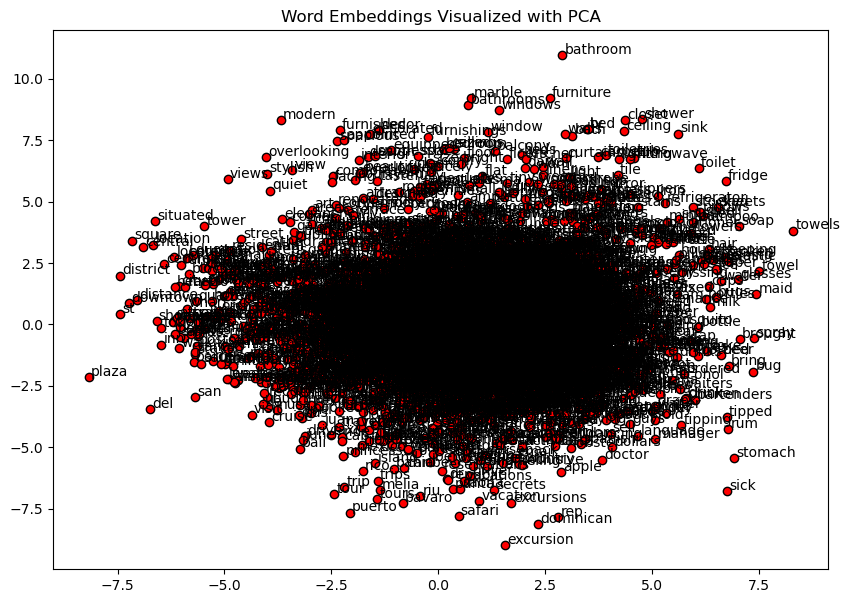

In [86]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], edgecolors='k', c='r')
for word, (x, y) in zip(words, word_vectors_pca):
    plt.text(x+0.05, y+0.05, word)
plt.title("Word Embeddings Visualized with PCA")
plt.show()

The PCA visualization shows a wide dispersion of words in the embeddings space, indicating a variety of topics and aspects covered in the reviews. However, there is no clear distinction between different types of words, which might suggest that the Word Embeddings model is able to capture nuances in the data.

**Relationship between Embeddings and Sentiments/Ratings:** Explore if there are any visible patterns in the way reviews of different sentiments or ratings are grouped together in the embeddings space.

In [87]:
embeddings = X_train_embeddings  # Your embeddings
labels = y_train                # Your sentiment or rating labels

In [88]:
# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

In [89]:
# Convert to a DataFrame for easier plotting
tsne_df = pd.DataFrame({
    'X': embeddings_tsne[:,0],
    'Y': embeddings_tsne[:,1],
    'label': labels
})

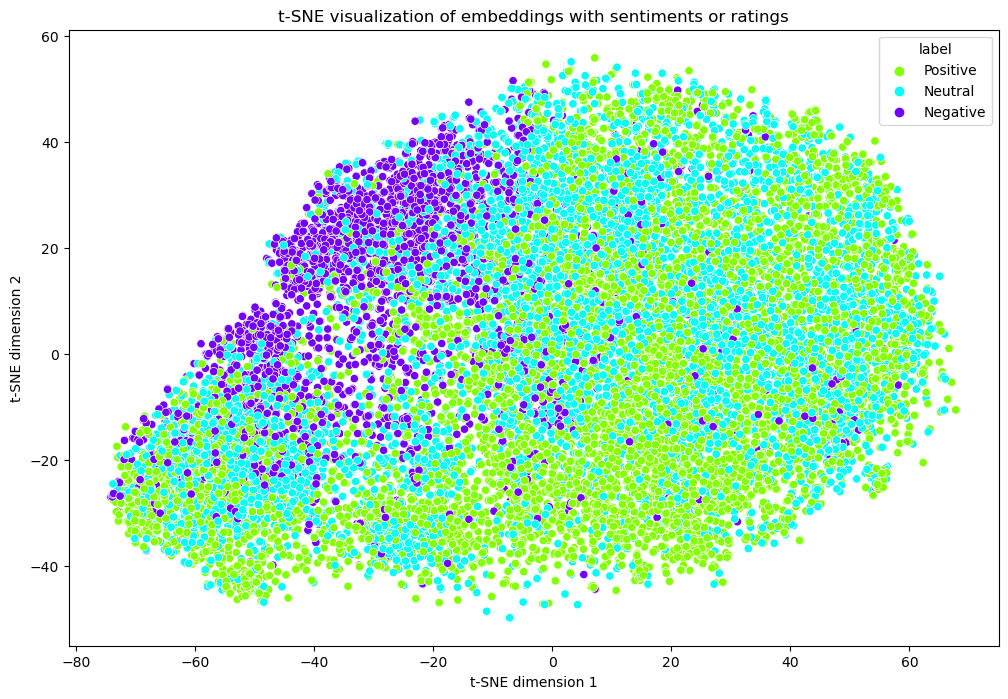

In [90]:
# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x="X", y="Y", hue="label", data=tsne_df, palette=sns.color_palette("hsv", len(tsne_df['label'].unique())))
plt.title('t-SNE visualization of embeddings with sentiments or ratings')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

The t-SNE plot shows the embeddings colored by sentiment. Although there is some mixing, there appears to be a clustering of sentiments, suggesting that the model may be capturing some semantic structure related to sentiment.

- **Anomaly Detection:**

Looks for outliers or unusual patterns in the data.

In [91]:
# Anomaly Detection (Outliers in Ratings)
data['Rating'] = data['Rating'].astype(int)
# Assuming that a rating is considered an outlier if it is below 2 or above 4
outliers = data[(data['Rating'] < 2) | (data['Rating'] > 4)]
print("Number of outlier reviews:", outliers.shape[0])

Number of outlier reviews: 10475


In [92]:
# Display some of the outlier reviews
print(outliers[['Cleaned_Review', 'Rating']].head())

                                      Cleaned_Review  Rating
3  great wonderful time hotel location excellent ...       5
4  great stay great went seahawk game downfall vi...       5
5  love monaco staff husband stayed hotel crazy w...       5
6  cozy stay rainy husband spent nights monaco ea...       5
8  hotel stayed hotel monaco rooms generous decor...       5


The provided reviews are overwhelmingly positive, as reflected by the consistent 5-star ratings. Common themes include praise for hotel locations, experiences, and staff, with specific mentions of a "wonderful time," "great stay," and the Monaco hotel, indicating high customer satisfaction.

**Review of Ratings Extremes:** Identifies if there are reviews with extremely high or low ratings and examines their content to see if they reveal anything unusual.

In [93]:
# Find reviews with the highest rating (e.g., 5)
highest_rated_reviews = data[data['Rating'] == 5]['Cleaned_Review']

In [94]:
# Find reviews with the lowest rating (e.g., 1)
lowest_rated_reviews = data[data['Rating'] == 1]['Cleaned_Review']

In [95]:
# Display a few of the highest and lowest-rated reviews
print("Highest Rated Reviews (Sample):")
print(highest_rated_reviews.sample(5))  # Display 5 random high-rated reviews

Highest Rated Reviews (Sample):
7979     fabulous husband wonderful experience booking ...
3529     second trip ibb fith time stayed old coral ham...
12894    friendly clean excellent small boutique hotel ...
1245     wonderful stay yes rooms small new york need r...
443      stayed hotel max trip decided share room save ...
Name: Cleaned_Review, dtype: object


The sample of highest rated reviews features descriptions like "cozy little inn" and "perfect travelers budget stay," suggesting that attributes such as coziness, affordability, and location play significant roles in achieving high customer satisfaction. These reviews typically reflect positive experiences with specific mentions of comfort and enjoyment.

In [96]:
print("\nLowest Rated Reviews (Sample):")
print(lowest_rated_reviews.sample(5))  # Display 5 random low-rated reviews


Lowest Rated Reviews (Sample):
17797    expected say wife disappointed punta cana seve...
12688    staff respect sleeping guests staff friendly h...
12486    save money grand paradise bavaro rated star ha...
12026    checked hotel late night earlier left immediat...
9019     stay advantage fact hotel mins bus journey mis...
Name: Cleaned_Review, dtype: object


The sample of lowest rated reviews contains strong negative language, advising to "stay away" and using terms like "screwed reservation" and "lousy place," indicating serious dissatisfaction. Issues range from service problems to room quality, highlighting areas of potential improvement for the establishments mentioned.

**Analysis of Reviews with Sentiment Contrary to Ratings:** Investigates cases where the numerical rating does not appear to align with the inferred sentiment of the text.

In [97]:
# Define misalignment conditions
# For example, high rating with negative sentiment or low rating with positive sentiment
misaligned_high_rating = (data['Rating'] >= 4) & (data['Review_Sentiment'] == 'Negative')
misaligned_low_rating = (data['Rating'] <= 2) & (data['Review_Sentiment'] == 'Positive')

In [98]:
# Filter misaligned reviews
misaligned_reviews = data[misaligned_high_rating | misaligned_low_rating]

In [99]:
# Display a few misaligned reviews
print("Misaligned Reviews (Sample):")
print(misaligned_reviews[['Rating', 'Cleaned_Review', 'Review_Sentiment']].sample(5))

Misaligned Reviews (Sample):
       Rating                                     Cleaned_Review  \
15430       2  longer mas bus connection singapore standards ...   
20216       2  excited stay hotel visiting read reviews hotel...   
3424        2  check check reviews school vacations price hig...   
11093       1  overrated place nearby night moving hyatt rede...   
18837       2  beautiful resort problems husband returned tri...   

      Review_Sentiment  
15430         Positive  
20216         Positive  
3424          Positive  
11093         Positive  
18837         Positive  


The misaligned reviews show positive sentiments like "superb" and "good" but have low ratings of 1 or 2, indicating a discrepancy that could stem from nuanced experiences or inconsistencies in how individuals express ratings versus sentiment in text.

# 11. Hyperparameter Tuning with Word Embeddings

### Use the knowledge gained from the EDA to make adjustments to the model and hyperparameters, and build the model again - Week 9 - Do the same for each Model - Week 10

Based on the EDA findings, the following steps can be considered for hyperparameter fitting of the **Logistic Regression** model with Word Embeddings:

- **Class Balancing:** Given the clear imbalance in ratings and sentiments, consider using the class_weight parameter to balance the classes automatically or apply oversampling or undersampling techniques.

- **Regularization:** adjust regularization parameters (C, penalty) to avoid overfitting, especially since some classes have many more samples than others.

- **Hyperparameter Search with Cross Validation:** Implement an internal hyperparameter search to find the best value of C. Use cross-validation to ensure that the model evaluation is more robust and less susceptible to fluctuations in the training data. 

By putting all these elements together, we aim to create a model that is not only capable of understanding the complexity and subtleties of the natural language contained in the reviews, but is also robust, generalizable and fair in its predictions across classes.

### 11.1 Splitting the training data into training and validation sets

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train_emb, X_val_emb, y_train_emb, y_val_emb = train_test_split(X_train_embeddings, y_train, test_size=0.25, random_state=42)

### - Logistic Regression with Word Embeddings

In [102]:
from sklearn.model_selection import GridSearchCV

- **Defining Hyperparameters for Model Architecture**

In [103]:
# Defining hyperparameters for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500]}

- **Using Cross-Validation Technique**

In [104]:
# Creating Grid Search with Cross-Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_emb, y_train_emb)

C:\Users\Marcela\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marcela\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 500]},
             scoring='accuracy')

- **Evaluating the Model Performance on the Test Set**

In [105]:
# Evaluating on the validation set
print("Best hyperparameters for Logistic Regression:", grid_lr.best_params_)
y_val_pred_lr = grid_lr.predict(X_val_emb)
print("Validation Classification Report for Logistic Regression:")
print(classification_report(y_val_emb, y_val_pred_lr))

Best hyperparameters for Logistic Regression: {'C': 1, 'max_iter': 100}
Validation Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.76      0.71      0.74       637
     Neutral       0.64      0.64      0.64      1647
    Positive       0.73      0.75      0.74      1814

    accuracy                           0.70      4098
   macro avg       0.71      0.70      0.71      4098
weighted avg       0.70      0.70      0.70      4098



In [106]:
# Evaluating on the test set
y_test_pred_lr = grid_lr.predict(X_test_embeddings)
print("Test Classification Report for Logistic Regression:")
print(classification_report(y_test, y_test_pred_lr))

Test Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.76      0.74      0.75       625
     Neutral       0.67      0.65      0.66      1684
    Positive       0.74      0.77      0.75      1790

    accuracy                           0.72      4099
   macro avg       0.72      0.72      0.72      4099
weighted avg       0.71      0.72      0.71      4099



### - Random Forest with Word Embeddings

- **Defining Hyperparameters for Model Architecture**

In [107]:
# Defining hyperparameters for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}

- **Using Cross-Validation Technique**

In [108]:
# Creating Grid Search with Cross-Validation
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_emb, y_train_emb)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

- **Evaluating the Model Performance on the Test Set**

In [109]:
# Evaluating on the validation set
print("Best hyperparameters for Random Forest:", grid_rf.best_params_)
y_val_pred_rf = grid_rf.predict(X_val_emb)
print("Validation Classification Report for Random Forest:")
print(classification_report(y_val_emb, y_val_pred_rf))

Best hyperparameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Validation Classification Report for Random Forest:
              precision    recall  f1-score   support

    Negative       0.76      0.59      0.67       637
     Neutral       0.60      0.61      0.61      1647
    Positive       0.70      0.74      0.72      1814

    accuracy                           0.66      4098
   macro avg       0.69      0.65      0.66      4098
weighted avg       0.67      0.66      0.66      4098



In [110]:
# Evaluating on the test set
y_test_pred_rf = grid_rf.predict(X_test_embeddings)
print("Test Classification Report for Random Forest:")
print(classification_report(y_test, y_test_pred_rf))

Test Classification Report for Random Forest:
              precision    recall  f1-score   support

    Negative       0.77      0.59      0.67       625
     Neutral       0.64      0.63      0.64      1684
    Positive       0.71      0.77      0.74      1790

    accuracy                           0.69      4099
   macro avg       0.70      0.66      0.68      4099
weighted avg       0.69      0.69      0.68      4099



### - SVM with Word Embeddings

- **Defining Hyperparameters for Model Architecture**

In [111]:
# Defining hyperparameters for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}

- **Using Cross-Validation Technique**

In [112]:
# Creating Grid Search with Cross-Validation
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_emb, y_train_emb)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy')

- **Evaluating the Model Performance on the Test Set**

In [113]:
# Evaluating on the validation set
print("Best hyperparameters for SVM:", grid_svm.best_params_)
y_val_pred_svm = grid_svm.predict(X_val_emb)
print("Validation Classification Report for SVM:")
print(classification_report(y_val_emb, y_val_pred_svm))

Best hyperparameters for SVM: {'C': 10, 'gamma': 0.01}
Validation Classification Report for SVM:
              precision    recall  f1-score   support

    Negative       0.77      0.71      0.74       637
     Neutral       0.65      0.65      0.65      1647
    Positive       0.74      0.76      0.75      1814

    accuracy                           0.71      4098
   macro avg       0.72      0.70      0.71      4098
weighted avg       0.71      0.71      0.71      4098



In [114]:
# Evaluating on the test set
y_test_pred_svm = grid_svm.predict(X_test_embeddings)
print("Test Classification Report for SVM:")
print(classification_report(y_test, y_test_pred_svm))

Test Classification Report for SVM:
              precision    recall  f1-score   support

    Negative       0.76      0.72      0.74       625
     Neutral       0.67      0.65      0.66      1684
    Positive       0.74      0.77      0.75      1790

    accuracy                           0.71      4099
   macro avg       0.72      0.71      0.72      4099
weighted avg       0.71      0.71      0.71      4099



# Conclusion:

Based on the above results:

### Logistic Regression with Word Embeddings

- **Validation Set:** Accuracy = 70%, Macro Avg F1-Score = 70%

- **Test Set:** Accuracy = 71%, Macro Avg F1-Score = 71%

### Random Forest with Word Embeddings

- **Validation Set:** Accuracy = 66%, Macro Avg F1-Score = 66%
- **Test Set:** Accuracy = 69%, Macro Avg F1-Score = 68%

### SVM with Word Embeddings

- **Validation Set:** Accuracy = 71%, Macro Avg F1-Score = 71%
- **Test Set:** Accuracy = 71%, Macro Avg F1-Score = 72%

### Evaluation:

- **Accuracy & F1-Score:** Logistic Regression and SVM both show similar and highest accuracies and f1-scores on the test set, outperforming Random Forest.

- **Consistency:** The performance of Logistic Regression and SVM is quite consistent between validation and test sets, which is a good indicator of model stability.

- **Class-wise Performance:** SVM slightly edges out in terms of macro average f1-scores in the test set, suggesting a slightly better balance in handling different classes.

### Conclusion:

- SVM with Word Embeddings appears to be the best model due to its slightly higher macro average f1-score on the test set and consistent performance across different classes. This indicates a good balance in handling class imbalances.
- Logistic Regression with Word Embeddings is a close second and could be preferred for simpler interpretability or faster prediction times.
- Random Forest with Word Embeddings lags slightly behind the other two models in terms of overall metrics.

While the differences are not substantial, the slight edge in the balanced performance (as indicated by the macro avg f1-scores) makes SVM the preferred model in this case.

# 12. Pre-trained models which analyze the sentiment using REST API.


In [ ]:
pip install pandas transformers torch
